In [1]:
import pandas as pd
import numpy as np
import os

pd.set_option('max_columns',None)
#pd.set_option('max_rows',None)

In [ ]:
's3://data-bpop-dev-sandbox/estandarizado/producto

## Exploring Activos - Originaciones

In [2]:
BASE_PATH_ACT = '/mnt/s3-refined-popular/data_orig/productos/activo/'
# loading Mora
str_dates = ['01-2018','02-2018','03-2018','04-2018','05-2018','06-2018','07-2018','08-2018','09-2018','10-2018',
             '11-2018','12-2018','01-2019','02-2019','03-2019','04-2019','05-2019','06-2019','07-2019','08-2019'
            ,'09-2019','10-2019','11-2019','12-2019']
str_dates_fin = ['11-2018','12-2018','01-2019','02-2019','03-2019','04-2019','05-2019','06-2019','07-2019','08-2019'
                ,'09-2019','10-2019','11-2019','12-2019']

In [3]:
str_date = str_dates[0]
types = {'id_cliente':str,'nrooblig':str}
name_file = os.path.join(BASE_PATH_ACT,'productos_activo_sarc_M'+str_date.split('-')[1]+str_date.split('-')[0]+'.csv')
act_df = pd.read_csv(name_file,sep='|', encoding='utf-8',dtype=types,nrows=20)
activos_df = pd.DataFrame(columns=list(act_df.columns))

del str_date, types, name_file, act_df

In [ ]:
types = {'id_cliente':str,'nrooblig':str}

for i, str_date in enumerate(str_dates):
    print('File: ',str_date)
    name_file = os.path.join(BASE_PATH_ACT,'productos_activo_sarc_M'+str_date.split('-')[1]+str_date.split('-')[0]+'.csv')
    activos_df_temp = pd.read_csv(name_file,sep='|', encoding='utf-8',dtype=types)
    
    if i < 17:
        activos_df_temp['fecdes'] = pd.to_datetime(activos_df_temp['fecdes'],format='%d/%m/%Y')
    else:
        activos_df_temp['fecdes'] = pd.to_datetime(activos_df_temp['fecdes'],format='%Y-%m-%d')
        
    activos_df_temp['date'] = pd.to_datetime(str_date,format='%m-%Y')
    activos_df_temp['fecha_activo'] = activos_df_temp['date'].dt.strftime('%Y%m')
    activos_df_temp['fecha_activo'] = activos_df_temp['fecha_activo'].fillna('999999').astype('int')
    activos_df_temp['id_cliente']   = activos_df_temp['id_cliente'].fillna('-1').astype('int')
    activos_df_temp['nrooblig']     = activos_df_temp['nrooblig'].fillna('-1').astype('int')
    activos_df_temp = activos_df_temp[(activos_df_temp['id_cliente']!=-1) & (activos_df_temp['nrooblig']!=-1) ]
    activos_df = pd.concat([activos_df,activos_df_temp],ignore_index=True)

File:  01-2018


/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



File:  02-2018
File:  03-2018
File:  04-2018
File:  05-2018
File:  06-2018
File:  07-2018
File:  08-2018
File:  09-2018
File:  10-2018
File:  11-2018
File:  12-2018
File:  01-2019
File:  02-2019
File:  03-2019
File:  04-2019
File:  05-2019
File:  06-2019
File:  07-2019
File:  08-2019
File:  09-2019
File:  10-2019
File:  11-2019


In [5]:
# Conteo por fechas
activos_df['fecha_activo'].value_counts().sort_index()

201801.0    544035
201802.0    544892
201803.0    545378
201804.0    548121
201805.0    550804
201806.0    551177
201807.0    549334
201808.0    552295
201809.0    553757
201810.0    556378
201811.0    560697
201812.0    560471
201901.0    560688
201902.0    561907
201903.0    563821
201904.0    566417
201905.0    565432
201906.0    562758
201907.0    560519
201908.0    562850
201909.0    562428
201910.0    567632
201911.0    569916
201912.0    571888
Name: fecha_activo, dtype: int64

In [6]:
activos_df.head()

,calif_cart,cod_ofic,cuota_paga,cupo_aprob,date,dias_morak,estado,fecdes,fecha_activo,fecven,id_cliente,lineacredi,nrooblig,plazo,sal_capita,sk_cliente,tasint_cte,tasint_mor,tipo_ident,tipo_producto,vlr_cuota,vlr_desemb
0,A,160,4600.0,0.0,2018-01-01,0,ACTIVO,2014-02-19,201801.0,05/10/2021,421952294130855802,66,16003240000103,92,14116763.0,1491360.0,19.42,30.95,1,LB,483279.0,19500000.0
1,A,29,5100.0,0.0,2018-01-01,0,ACTIVO,2013-09-30,201801.0,05/05/2021,962752294130988601,66,2903230000141,92,43357694.0,3314951.0,19.42,30.95,1,LB,1420831.0,70900000.0
2,A,670,1800.0,0.0,2018-01-01,0,ACTIVO,2016-07-07,201801.0,07/09/2024,243652294131526401,66,67003270000041,99,29786662.0,997616.0,13.89,30.95,1,LB,758806.0,32000000.0
3,A,351,3100.0,0.0,2018-01-01,0,ACTIVO,2015-05-21,201801.0,05/01/2023,636652306855578702,66,35103230000103,92,16441583.0,2219064.0,19.42,30.95,1,LB,523109.0,19000000.0
4,A,66,2500.0,0.0,2018-01-01,0,ACTIVO,2015-11-17,201801.0,05/08/2023,767952294131849401,66,6603230000341,92,8950291.0,2310088.0,18.01,30.95,1,LB,267054.0,10000000.0


In [7]:
activos_df['num_months'] = [(x.year - y.year) * 12 + (x.month - y.month) for x,y in zip(activos_df['date'],activos_df['fecdes'])]
activos_df['origina'] = np.where(activos_df['num_months']==0,1,0)
activos_df['llave'] = [str(x)+'_'+str(y) for x,y in zip(activos_df['id_cliente'],activos_df['nrooblig'])]

In [9]:
# Porcentaje cruce:

str_dates = list(pd.Series(activos_df['fecha_activo'].unique()).sort_values())
dates = list(pd.Series(activos_df['fecha_activo'].unique()).sort_values())[1:]

for ix,date in enumerate(dates):
    print('Fecha:',date)
    id_temp = activos_df.loc[activos_df['fecha_activo'] == str_dates[ix],'llave'].unique()
    temp = activos_df[activos_df['fecha_activo'] == date]
    temp['originacion'] = np.where(temp['llave'].isin(id_temp),0,1)
    if ix == 0:
        df_final = temp
    else:
        df_final = pd.concat([df_final,temp],ignore_index=True)
    del id_temp, temp

Fecha: 201802.0


/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Fecha: 201803.0
Fecha: 201804.0
Fecha: 201805.0
Fecha: 201806.0
Fecha: 201807.0
Fecha: 201808.0
Fecha: 201809.0
Fecha: 201810.0
Fecha: 201811.0
Fecha: 201812.0
Fecha: 201901.0
Fecha: 201902.0
Fecha: 201903.0
Fecha: 201904.0
Fecha: 201905.0
Fecha: 201906.0
Fecha: 201907.0
Fecha: 201908.0
Fecha: 201909.0
Fecha: 201910.0
Fecha: 201911.0
Fecha: 201912.0


In [10]:
df_final.columns

Index(['calif_cart', 'cod_ofic', 'cuota_paga', 'cupo_aprob', 'date',
       'dias_morak', 'estado', 'fecdes', 'fecha_activo', 'fecven',
       'id_cliente', 'lineacredi', 'nrooblig', 'plazo', 'sal_capita',
       'sk_cliente', 'tasint_cte', 'tasint_mor', 'tipo_ident', 'tipo_producto',
       'vlr_cuota', 'vlr_desemb', 'num_months', 'origina', 'llave',
       'originacion'],
      dtype='object')

In [11]:
activos_df_tc_trad = df_final[df_final['lineacredi']==61]
activos_df_tc_expr = df_final[df_final['lineacredi']==62]

In [12]:
activos_df_tc_trad.shape

(1396677, 26)

In [13]:
pd.merge(activos_df_tc_trad.groupby(['date'])['originacion'].sum().reset_index(name='conteo_trad'),
         activos_df_tc_expr.groupby(['date'])['originacion'].sum().reset_index(name='conteo_expr'),
         on='date')

,date,conteo_trad,conteo_expr
0,2018-02-01,1960,4136
1,2018-03-01,1977,4246
2,2018-04-01,2408,5877
3,2018-05-01,2610,5207
4,2018-06-01,2312,5258
5,2018-07-01,2230,4606
6,2018-08-01,2345,6384
7,2018-09-01,2615,5307
8,2018-10-01,2580,5998
9,2018-11-01,2492,6556


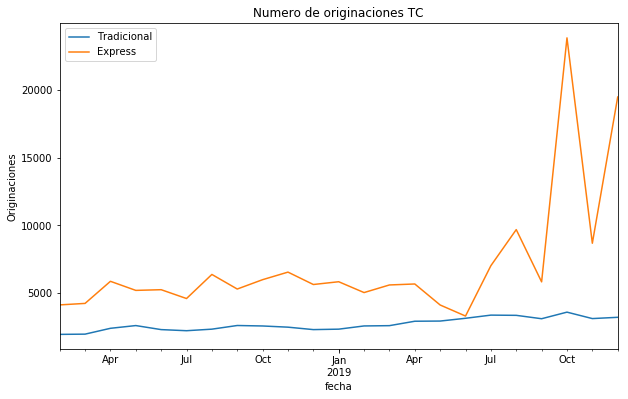

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
activos_df_tc_trad.groupby(['date'])['originacion'].sum().plot()
activos_df_tc_expr.groupby(['date'])['originacion'].sum().plot()
plt.title('Numero de originaciones TC')
plt.xlabel('fecha')
plt.ylabel('Originaciones')
plt.legend(('Tradicional', 'Express'))

## Mora

In [16]:
# loading Mora
BASE_PATH_MORA = '/mnt/work/CU_Cobranzas/ModelVersion1/objects/Mora/'
path_out_mora = os.path.join(BASE_PATH_MORA,'moras_201809-201912.parquet')
mora_total = pd.read_parquet(path_out_mora, engine="pyarrow")

In [17]:
mora_total.columns

Index(['ciudad_of', 'dia_fecha', 'dias', 'fecha_apertura', 'fecha_corte',
       'id_cliente', 'nrooblig', 'product_id', 'saldo_mora', 'year_mes'],
      dtype='object')

In [19]:
mora_total = mora_total[['id_cliente','nrooblig','fecha_apertura','product_id']].drop_duplicates()
mora_total['fecha_apertura_mes'] = pd.to_datetime(mora_total['fecha_apertura'].dt.strftime('%Y-%m'), format='%Y-%m')
mora_total['llave'] = [str(x)+'_'+str(y) for x,y in zip(mora_total['id_cliente'],mora_total['nrooblig'])]

In [ ]:
mora_total[['id_cliente','nrooblig','fecha_apertura_mes','product_id']].drop_duplicates().groupby('fecha_apertura_mes').size()

In [20]:
mora_total.head()

,id_cliente,nrooblig,fecha_apertura,product_id,fecha_apertura_mes,llave
0,193655260482175901,47003010196582,2014-04-29,66.0,2014-04-01,193655260482175901_47003010196582
20,193655260482175901,47003350008884,2018-09-20,66.0,2018-09-01,193655260482175901_47003350008884
29,802052307502808602,47003040000656,2018-05-28,66.0,2018-05-01,802052307502808602_47003040000656
59,586952293131037202,660112000000303564,2017-04-13,62.0,2017-04-01,586952293131037202_660112000000303564
89,644055599166846201,660154000000369042,2018-09-13,62.0,2018-09-01,644055599166846201_660154000000369042


In [21]:
mora_tc_trad = mora_total[mora_total['product_id']==61]
mora_tc_expr = mora_total[mora_total['product_id']==62]

In [22]:
date = pd.to_datetime('2018-01-01', format='%Y-%m-%d')

pd.merge(mora_tc_trad[mora_tc_trad['fecha_apertura_mes']>=date].groupby(['fecha_apertura_mes']).size().reset_index(name='conteo_trad'),
         mora_tc_expr[mora_tc_expr['fecha_apertura_mes']>=date].groupby(['fecha_apertura_mes']).size().reset_index(name='conteo_expr'),
         on='fecha_apertura_mes').sort_values('fecha_apertura_mes')

,fecha_apertura_mes,conteo_trad,conteo_expr
0,2018-01-01,1013,3254
1,2018-02-01,1148,3094
2,2018-03-01,970,4120
3,2018-04-01,1390,4728
4,2018-05-01,1406,5206
5,2018-06-01,1338,6199
6,2018-07-01,1296,6607
7,2018-08-01,1403,7236
8,2018-09-01,1457,6514
9,2018-10-01,1377,6695


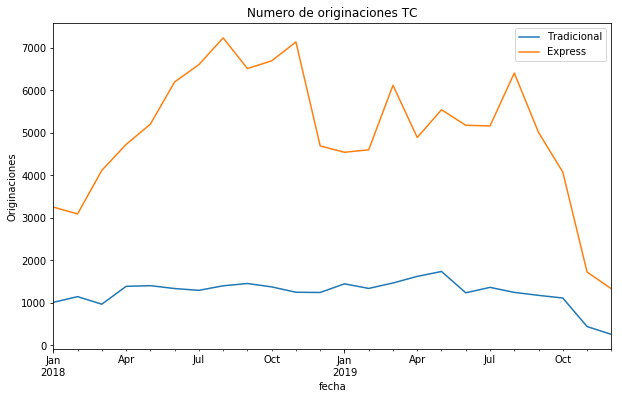

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mora_tc_trad[mora_tc_trad['fecha_apertura_mes']>=date].groupby(['fecha_apertura_mes']).size().plot()
mora_tc_expr[mora_tc_expr['fecha_apertura_mes']>=date].groupby(['fecha_apertura_mes']).size().plot()
plt.title('Numero de originaciones TC')
plt.xlabel('fecha')
plt.ylabel('Originaciones')
plt.legend(('Tradicional', 'Express'))